In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lake_huron = pd.read_csv('data/LakeHuron.csv')
lake_huron = lake_huron.rename(columns={"value": "feet"})
lake_huron_first_quarter = lake_huron[0:25]
lake_huron_second_quarter = lake_huron[26:50]
lake_huron_third_quarter = lake_huron[51:75]
lake_huron_fourth_quarter = lake_huron[76:100]
lake_huron   

# time is  the current year
#value is the level in feet

,rownames,time,feet
0,1,1875,580.38
1,2,1876,581.86
2,3,1877,580.97
3,4,1878,580.80
4,5,1879,579.79
...,...,...,...
93,94,1968,578.52
94,95,1969,579.74
95,96,1970,579.31
96,97,1971,579.89


In [48]:
#This would be used to remove unwanted values, I.e. filter out values below 585 for example

# Find the lowest measurement
#lowest_measurement = lake_huron_first_quarter['feet'].min() #setting to min has no effect

# Filter the data to exclude values below the lowest measurement
#filtered_data = lake_huron_first_quarter[lake_huron_first_quarter['feet'] >= lowest_measurement]

#filtered_data

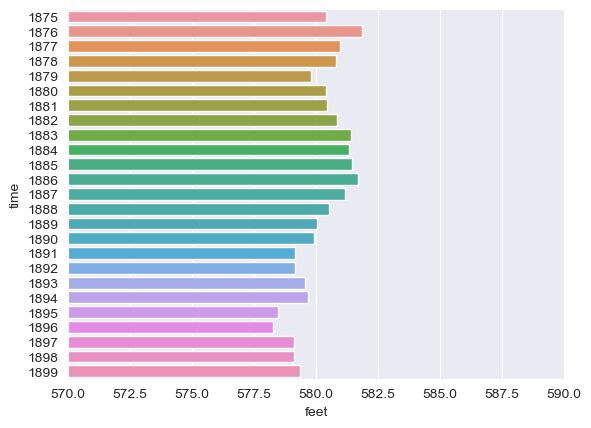

In [49]:

# Create the horizontal bar plot using seaborn
sns.barplot(x="feet", y="time", data=lake_huron_first_quarter, orient="h", )
#order=lake_huron_first_quarter["feet"]  would sort plot by feet (already sorted by year)

# Set the y-axis limits to exclude the range 0-400
plt.xlim(570, 590)

# Display the plot
plt.show()

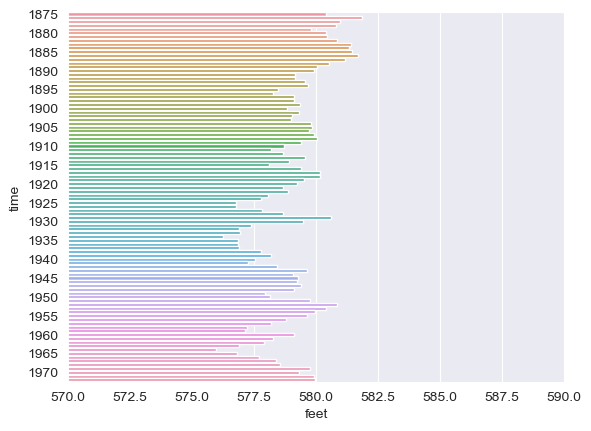

In [64]:
# Create the horizontal bar plot using seaborn
sns.barplot(x="feet", y="time", data=lake_huron, orient="h", )
#order=lake_huron_first_quarter["feet"]  would sort plot by feet (already sorted by year)

# Display only every 5th time value on the y-axis
plt.yticks(range(0, len(lake_huron), 5), lake_huron['time'][::5])

# Set the y-axis limits to exclude the range 0-400
plt.xlim(570, 590)

# Display the plot
plt.show()

([<matplotlib.axis.YTick at 0x1b2342c0dd0>,
 [Text(0, 0, '1875'),
  Text(0, 5, '1880'),
  Text(0, 10, '1885'),
  Text(0, 15, '1890'),
  Text(0, 20, '1895'),
  Text(0, 25, '1900'),
  Text(0, 30, '1905'),
  Text(0, 35, '1910'),
  Text(0, 40, '1915'),
  Text(0, 45, '1920'),
  Text(0, 50, '1925'),
  Text(0, 55, '1930'),
  Text(0, 60, '1935'),
  Text(0, 65, '1940'),
  Text(0, 70, '1945'),
  Text(0, 75, '1950'),
  Text(0, 80, '1955'),
  Text(0, 85, '1960'),
  Text(0, 90, '1965'),
  Text(0, 95, '1970')])

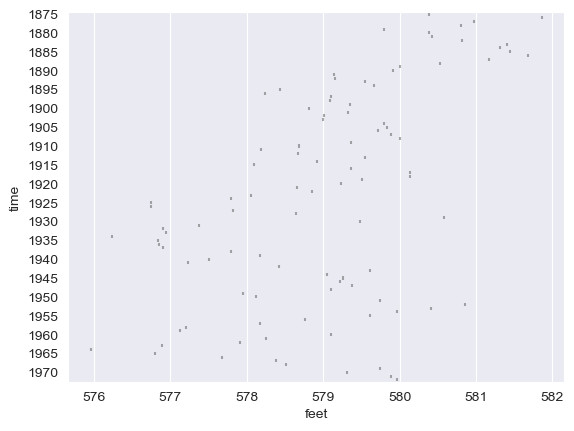

In [107]:
sns.boxenplot(x="feet", y="time", data=lake_huron, orient="h")

# Set the desired y-intercept value
#desired_intercept = 500

# Add a regression line below plot, constrained within the range
#sns.lmplot(x="feet", y="time", data=lake_huron, ci=None, scatter=False, truncate=True, x_estimator=pd.np.mean)

# Display only every 5th time value on the x-axis
#cannot be on with regplot because it is estimating y based on x
plt.yticks(range(0, len(lake_huron), 5), lake_huron['time'][::5])  


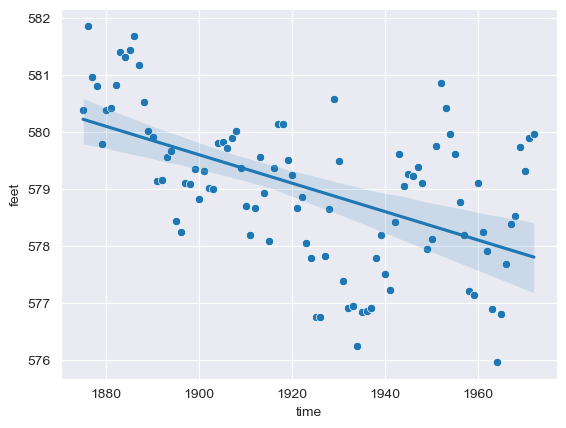

In [134]:
from statistics import LinearRegression
import numpy as np

# Create the scatter plot using seaborn
sns.scatterplot(x="time", y="feet", data=lake_huron)

# Add a regression line on top of the plot
#truncate ensures it stays within the range of values, robust includes outliers
#The x_estimator=pd.np.mean parameter specifies the estimator to use for the regression line, which in this case is the mean value of x.
sns.regplot(x="time", y="feet", data=lake_huron, scatter=False, truncate=True, robust=True)

# Set the desired range of values
min_value = 1870
max_value = 1980

# Set the y-axis limits to the desired range
#plt.xlim(min_value, max_value)

plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

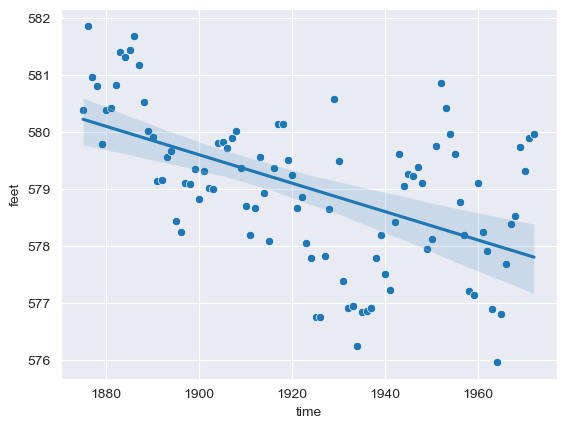

In [142]:

# Create the scatter plot using seaborn
sns.scatterplot(x="time", y="feet", data=lake_huron)

# Fit a polynomial regression model
degree = 1  # Degree of the polynomial regression model (1 for linear regression)
coefficients = np.polyfit(lake_huron['time'], lake_huron['feet'], degree)
poly = np.poly1d(coefficients)

# Generate x values for the regression line
x_values = np.linspace(lake_huron['feet'].min(), lake_huron['feet'].max(), 100)

# Evaluate the polynomial function for the x values
y_values = np.polyval(poly, x_values)

# Plot the regression line on top of the scatter plot
#plt.plot(x_values, y_values, color='r', label='Regression Line')

# Add a regression line on top of the scatter plot
sns.regplot(x="time", y="feet", data=lake_huron, scatter=False, truncate=True, robust=True)

# Display the plot
#plt.legend()
plt.show()

In [139]:
def fit_and_plot_line(x, y):
    # Convert x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)

    # Fit the best fit line using linear regression
    slope, intercept = np.polyfit(x, y, 1)

    # Generate the predicted y values
    predicted_y = slope * x + intercept

    # Plot the data points and the best fit line
    plt.scatter(x, y, label='Data')
    plt.plot(x, predicted_y, color='red', label='Best Fit Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

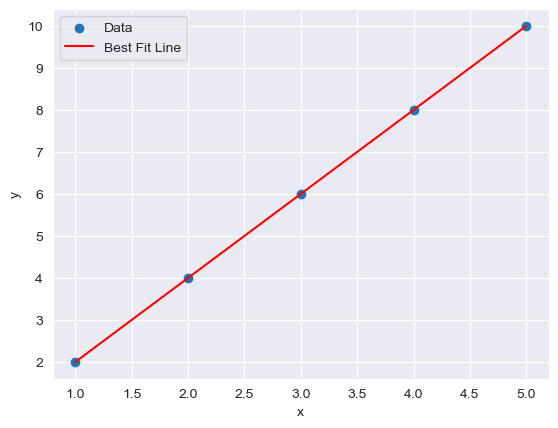

In [140]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
fit_and_plot_line(x, y)